# **Sales Analysis Project**

### Imprting necessary libraries

In [ ]:
import os
import pandas as pd

### Merge data from each month into one CSV

In [ ]:
April_sales_2019_filepath = '/content/drive/MyDrive/DATASETS/Sales_Analysis/Sales_Data/Sales_April_2019.csv'
df = pd.read_csv(April_sales_2019_filepath)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
files = [file for file in os.listdir('/content/drive/MyDrive/DATASETS/Sales_Analysis/Sales_Data')]

for file in files:
  print(file)

Sales_April_2019.csv
Sales_February_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv
Sales_January_2019.csv
Sales_December_2019.csv
Sales_March_2019.csv
Sales_June_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_September_2019.csv
Sales_October_2019.csv


In [ ]:
files = [file for file in os.listdir('/content/drive/MyDrive/DATASETS/Sales_Analysis/Sales_Data')]
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/drive/MyDrive/DATASETS/Sales_Analysis/Sales_Data/'+file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

Read the updated dataframe 

In [ ]:
all_data = pd.read_csv('/content/all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

Drop rows with Nan values

In [ ]:
nan_data = all_data[all_data.isna().any(axis = 1)]

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find the 'Or' in data and delete it.

In [ ]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

Convert columns to correct data type

In [ ]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

In [ ]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add a city column

In [ ]:
# Use apply method

def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2].split(' ')[1]

# all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

# Use f-String

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


## Data Exploration

What was the best month for sales? How much was earned that month?

In [ ]:
results = all_data.groupby('Month').sum()

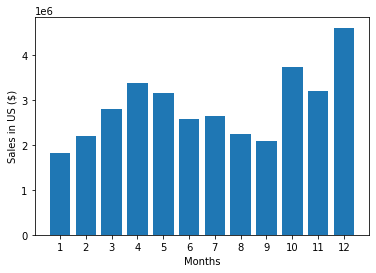

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])

plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in US ($)')

plt.show()



The best month for the sales was December with around 6 millions US dollar ($) in sales. The reason might be people byuing gifts and do shopping for Chritsmas. 

What City had the highest number of sales?

In [ ]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


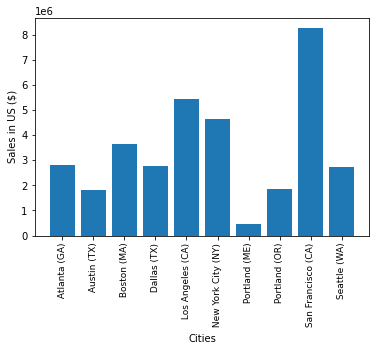

In [ ]:
import matplotlib.pyplot as plt


cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])

plt.xticks(cities, rotation = 'vertical', size=9)
plt.xlabel('Cities')
plt.ylabel('Sales in US ($)')

plt.show()


What time should we display advertisements to maximize likelihood of customer's buying product?

In [ ]:
# Converting string datetime column to real datetime
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

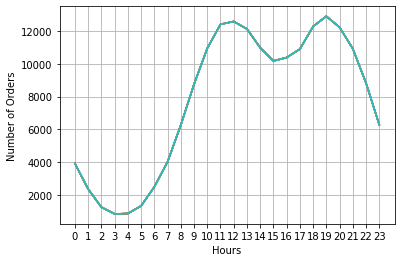

In [ ]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())

plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()

plt.show()

# My recomendation is around 11am or 7pm.

What products are most often sold togather?

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What products do you think sold the most? why do you think it sold the most?

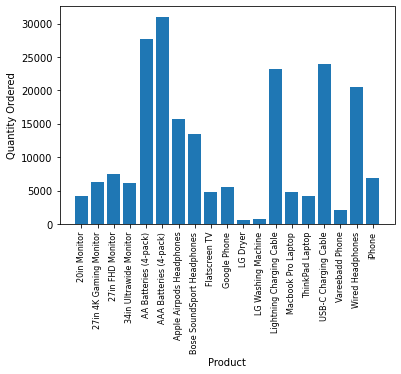

In [ ]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xticks(products, rotation='vertical', size =8)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

plt.show()

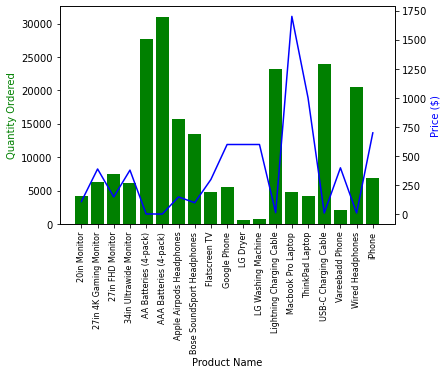

In [ ]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, color = 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size =8)

fig.show()

From the above graph it can be seen that when the **price is low** the **quantity ordered is high**.